<a href="https://colab.research.google.com/github/ctejanaidu/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'twitter-airline-sentiment:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17%2F742210%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240808%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240808T220118Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D28d876a364c823c1067fb184b0f88992204f8d0216e3f8c513f73d4f5b1c188738462414ce510a659af7fca4d5eae9016d2b589dc73c73b26302fe688fc895b8e9dd30028fd3dfc59e70aff41628aa1af59b18620c7c1d402599cd987da042ef469c8de2e2204e76eefc086570836e9d081411fb43cc6687d6b776986193f9d362066918ebedd6ee0348c157dc829ff298a43e67ed77d3002f25affc73085463b9f0b1ead9c7a3012ce87f92b4b43f9c05eedb8c77a3fd96c4e01ca17018ae6fa25380d6413dc9b0922f74d77d6ca91db0ac83628b2ec020b1c467f9b13c928bf6cbbc5e6c69ff4cdb1310607761757b03683c03ed630005c0e7a740d46c39bb,twitter-and-reddit-sentimental-analysis-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F429085%2F815876%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240808%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240808T220118Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D772dbdf40525b20900187adc72b488e8909371649ef8252dd6b4a8f02c9ee537c39b3902298f0678c611921b42dd3ee7ec3f100215129160f6eefae7da07de8eea69c1f855b9baab612a043f36451ce26aab0cd38acde4b1ef619440172064346e687316ab8715c5819ebca836dbf6c90018c7a1ced4f391daf0547626a08fd6f64e5f65ad064b546b197119be4db9e222ea21d65059c35c936e616527c786d9bdfaa5736f7b497ad252690ec84a84b0f207da0003808c2cadd94146761748e04088aadb4c3bba228251f0f1bc421aef152d5ea9395426addf07e6aca457458a2955d30a4a096ee0aef5449dfc119ccb9639f4e9ba8a9c57dae15ab4b9574bb9,appletwittersentimenttexts:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F652925%2F1154930%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240808%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240808T220118Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D88c9eba67a8001ca777c0f02beb67d4fa3eff867ed04e6e14bd69a3d4b51b291ff8cbb4bb46fa4a78837b1e506c5539e1edcd9e53591617dedc5bfadef2becc316467f1cac655453f10fbcba94295f87b6ca3b6328acd41c27486c234184e8c421dfe0ed42c72d7c26d0a7163b9ef0eaddff41ebdc047298c51e5e70f8aa5875577553ab96668b1574e12a928e439781ec43b21c710f85cbc03decfbcb45720afc9bef9df44bcf06ee4212b114847f7fba4fafee5574108978f2f3ae10cba050ae912cd0665083d7e80f6cae00cfed38a056837ad90fac5100fecdec413384a0452c9b19aff124fd9ea5b3a5bf01605c475ac0d54d8aa3ab9e3bd98a0edd511a,sentiment-analysis-for-financial-news:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F622510%2F1192499%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240808%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240808T220118Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D86ed13f6dfa1684dd82246ce4f352658110e33a7b5ac6ee06962fb87bab2a196a6269391a84bb67ef7138e7164f0a140cd99dadb18846c572ada71745239440ecf4b288722647ec3179a398875ff637a9d57dce80f735faf9970188c2661c87c12a299c82182b42a28cc8d891700a8bedc07790be5154e5c5ff8806e0f18df1d114c8408dbcbc7eed44f11eb2f2ace08235aa0e34dfc000da53c4772dd5cbfe88a48250eb15f7c5a7d64d583f6bf4313645efbc64dadb32cf7577d6cdc2c20b25dba532d46afd6a562094d6c2a2bf75d3a561e6f923f6f852603b4ebfdcb379eeac5ec709b4a35c6ee212b861cc0a07a7ffba7c81f5c134f2ebe03c9292306ce,twitterdata:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F739333%2F1281216%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240808%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240808T220118Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5eb229efb630d93b9c81367e92861a3a4d441bf8f8409499a84f1210855b2ddf4b8902c38ff15e36c8cbf236e8d911e2ab8f99d0decba7e6023bb1adb903e72a0f433836e57f3ff91f2099d840ab9fc68ab89310d224f94631de6c585cc2502e100460a88bed6e1b52dbec04b7e194b455d275f65849f0e5279c4650e7d34b6296cfff5a9ad1952e8f748bf933cd2113600c1c389968a838d052d13ecf5b37783a024b7c61182abac71f53b87447b52c5e5bcebd896868785301b54a6f0805735278ade83ac330e706cf46ba9080de2ad565e4149fb0d9ca78fe03e90f584f8cf1ea55d2109d3c6a252294e4612253ab44a181f712500b4e7a5fed60ebf3c7b3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2678605 bytes downloaded
Downloaded and uncompressed: twitter-airline-sentiment
[==================================================] 10534046 bytes downloaded
Downloaded and uncompressed: twitter-and-reddit-sentimental-analysis-dataset
[==================================================] 72694 bytes downloaded
Downloaded and uncompressed: appletwittersentimenttexts
[==================================================] 924875 bytes downloaded
Downloaded and uncompressed: sentiment-analysis-for-financial-news
[==================================================] 194641 bytes downloaded
Downloaded and uncompressed: twitterdata
Data source import complete.


## Overview

This script performs EDA and then preprocesses multiple datasets to train a bidirectional LSTM model which is in turn used to predict the sentiments behind tweets fetched in real time using `tweepy` and classify them as positive negative or neutral.

The model is then integrated with streamlit and deployed as a web-app.

**Checkout the web-app:** [Sententia](https://share.streamlit.io/kritanjalijain/twitter_sentiment_analysis/main/app.py)

## Installing and importing dependencies

To fetch tweets from twitter, we need to install the tweepy library. We will be using this package to pull tweets on which our model will make predictions.

In [2]:
!pip install tweepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: requests-oauthlib
    Found existing installation: requests-oauthlib 2.0.0
    Uninstalling requests-oauthlib-2.0.0:
      Successfully uninstalled requests-oauthlib-2.0.0


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Exploratory Data Analysis

### Cleaning and prepping dataset

In [4]:
# Load Tweet dataset
df1 = pd.read_csv('../input/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')
# Output first five rows
df1.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [5]:
# Load Tweet dataset
df2 = pd.read_csv('../input/appletwittersentimenttexts/apple-twitter-sentiment-texts.csv')
df2 = df2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
# Output first five rows

df2.head()

clean_text  category
0  Wow. Yall needa step it up @Apple RT @heynyla:...      -1.0
1  What Happened To Apple Inc?   http://t.co/FJEX...       0.0
2  Thank u @apple I can now compile all of the pi...       1.0
3  The oddly uplifting story of the Apple co-foun...       0.0
4  @apple can i exchange my iphone for a differen...       0.0

The `category` column has 3 values:
1. 0 Indicating it is a Neutral Sentiment
2. 1 Indicating a Postive Sentiment
3. -1 Indicating a Negative Sentiment

In [6]:
# Load Tweet dataset
df3 = pd.read_csv('../input/twitterdata/finalSentimentdata2.csv')
df3 = df3.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df3['category'] = df3['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
df3 = df3.drop(['Unnamed: 0'], axis=1)
# Output first five rows
df3.head()

category                                         clean_text
0      -1.0  agree the poor in india are treated badly thei...
1       1.0  if only i could have spent the with this cutie...
2       1.0  will nature conservation remain a priority in ...
3      -1.0  coronavirus disappearing in italy show this to...
4      -1.0  uk records lowest daily virus death toll since...

In [7]:
# Load Tweet dataset
df4 = pd.read_csv('../input/twitter-airline-sentiment/Tweets.csv')
df4 = df4.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
df4['category'] = df4['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df4 = df4[['category','clean_text']]
# Output first five rows
df4.head()

category                                         clean_text
0       0.0                @VirginAmerica What @dhepburn said.
1       1.0  @VirginAmerica plus you've added commercials t...
2       0.0  @VirginAmerica I didn't today... Must mean I n...
3      -1.0  @VirginAmerica it's really aggressive to blast...
4      -1.0  @VirginAmerica and it's a really big bad thing...

In [8]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [9]:
# Check for missing data
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [10]:
# drop missing rows
df.dropna(axis=0, inplace=True)

In [11]:
# dimensionality of the data
df.shape

(182329, 2)

In [12]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
df.head()

clean_text  category
0  when modi promised “minimum government maximum...  Negative
1  talk all the nonsense and continue all the dra...   Neutral
2  what did just say vote for modi  welcome bjp t...  Positive
3  asking his supporters prefix chowkidar their n...  Positive
4  answer who among these the most powerful world...  Positive

## Exploratory Data Analysis

Data Visualisation-

In [13]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

Plotting the distribution of tweet lengths

In [14]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['clean_text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

Plotting the distribution of text length for positive sentiment tweets

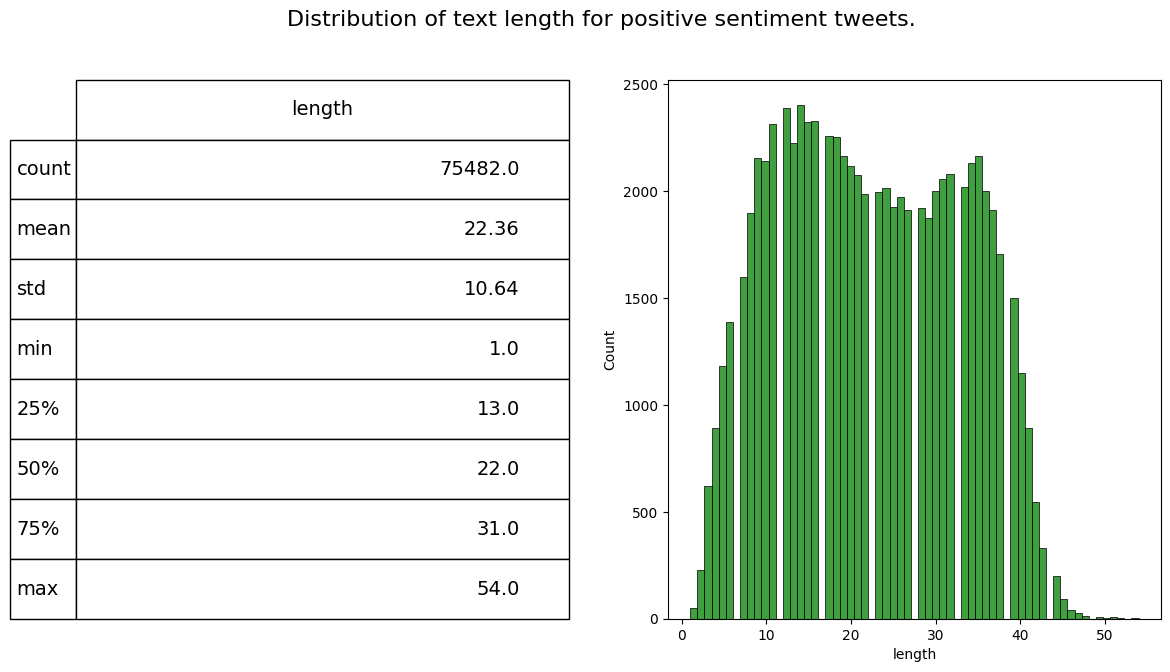

In [15]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

Plotting the Distribution of text length for Negative sentiment tweets.

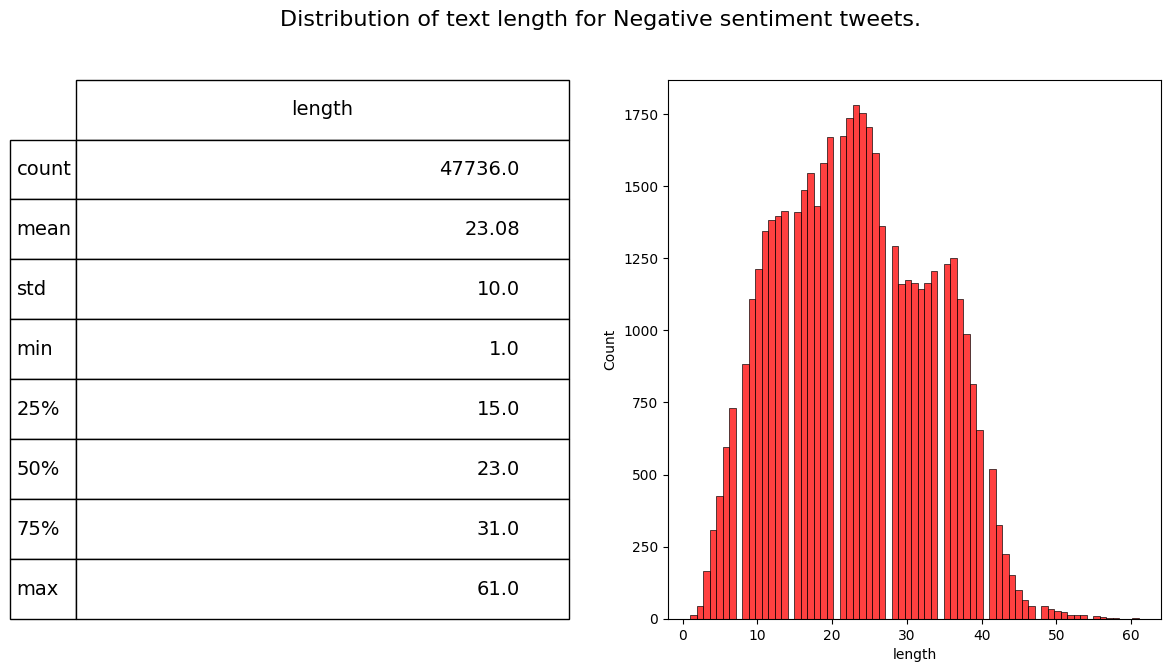

In [16]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

Plotting the Pie chart of the percentage of different sentiments of all the tweets

In [17]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [18]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
182335  @AmericanAir thank you we got on a different f...  Positive
182336  @AmericanAir leaving over 20 minutes Late Flig...  Negative
182337  @AmericanAir Please bring American Airlines to...   Neutral
182338  @AmericanAir you have my money, you change my ...  Negative
182339  @AmericanAir we have 8 ppl so we need 2 know h...   Neutral

[182329 rows x 2 columns]>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.0 MB/s eta 0:00:00


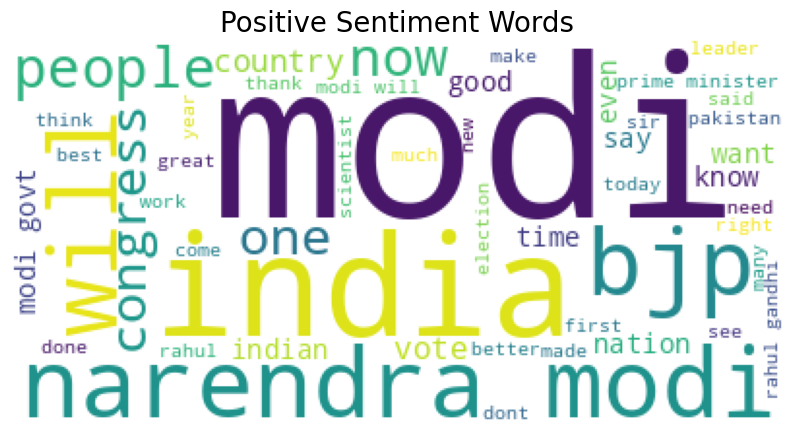

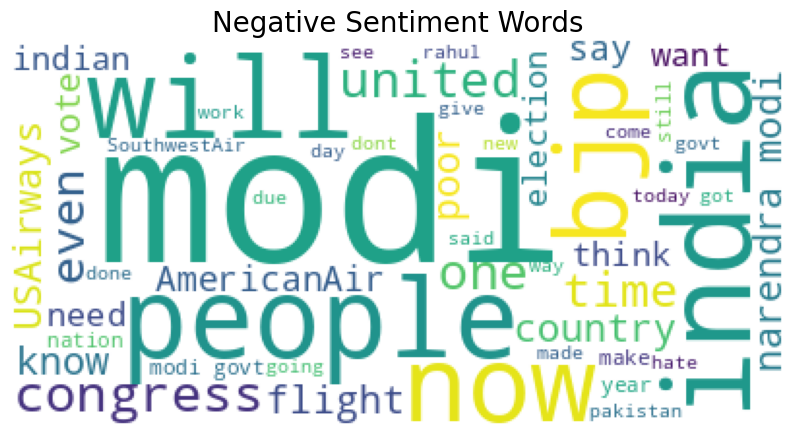

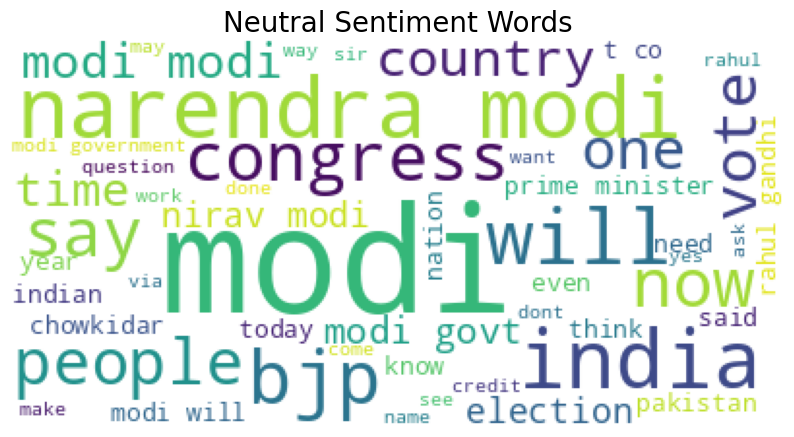

In [21]:
#### Visualizing data into wordclouds

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive tweet words
wordcount_gen(df, 'Positive')

# Negative tweet words
wordcount_gen(df, 'Negative')

# Neutral tweet words
wordcount_gen(df, 'Neutral')



## Data Preprocessing

In [22]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [23]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df['clean_text']))

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [25]:
print(X[0])
print(Y[0])

['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


### Train and test split

In [26]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

### Bag of words (BOW) feature extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x)
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [28]:
#import sklearn.preprocessing as pr

# Normalize BoW features in training and test set
#X_train = pr.normalize(X_train, axis=1)
#X_test  = pr.normalize(X_test, axis=1)

In [30]:
# print first 200 words/tokens
print(count_vector.get_feature_names_out()[0:200]) # Use get_feature_names_out() instead of get_feature_names()

['0' '000' '1' '10' '100' '1000' '10000' '10th' '11' '111' '1145' '11th'
 '12' '1200' '12000' '125' '12k' '130' '140' '14000' '15' '150' '1500'
 '1500000' '1520' '157200000' '15l' '15lac' '15lakh' '18' '180' '19'
 '1947' '1958' '1962' '1969' '1971' '1980' '1984' '1998' '1st' '2' '20'
 '200' '2000' '2002' '2004' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2022' '2024'
 '2029' '21st' '23' '23rd' '24' '247' '24x7' '25' '250' '2611' '26th'
 '272' '27th' '280319' '282' '28th' '2cr' '2day' '2nd' '3' '30' '300'
 '3000' '30000' '300km' '31st' '350' '35a' '370' '3rd' '4' '40' '400'
 '4000' '45' '456' '4th' '5' '50' '500' '5000' '50000' '5th' '5year' '5yr'
 '6' '60' '600' '6000' '6th' '7' '72000' '7200000' '72k' '7th' '8' '80'
 '800' '8020' '9' '90' '9000' 'aa' 'aadhaar' 'aadhar' 'aadmi' 'aag' 'aaj'
 'aalo' 'aam' 'aan' 'aap' 'aapk' 'aapko' 'aapl' 'aapn' 'aay' 'aaya'
 'aayega' 'aayog' 'abandon' 'abdul' 'abdullah' 'abe' 'abhi' 'abhinandan'
 '

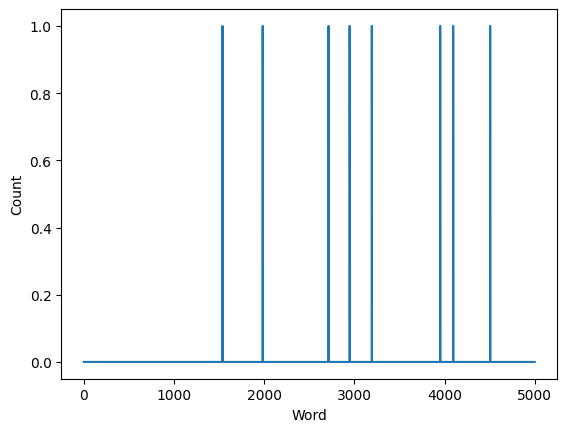

In [31]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

### Tokenizing & Padding

In [32]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  41    1  349   73 1911 1180   44 2465    2 1259  219    2  236   32
  165  102   53   55 1184  236   50    3    6  533    3   50 3833    3
 3077    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


### Saving tokenized data

In [33]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

### Train & Test Split

In [34]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (109397, 50) (109397, 3)
Validation Set -> (36466, 50) (36466, 3)
Test Set -> (36466, 50) (36466, 3)


In [35]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## Bidirectional LSTM Using NN

In [40]:
import tensorflow as tf

# Define your Keras model here first
model = tf.keras.models.Sequential([
    # Add your layers here
])

# Now you can plot the model
tf.keras.utils.plot_model(model, show_shapes=True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [44]:
!pip install pydot
!pip install graphviz
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
# decay_rate = learning_rate / epochs  # No longer needed
momentum = 0.8
max_len = 100 # You need to define max_len

# Remove 'decay' and use 'learning_rate'
sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

# Build the model by calling it on some dummy data
# This will set the input shape and initialize the layers
model.build(input_shape=(None, max_len))

tf.keras.utils.plot_model(model, show_shapes=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 702.8 kB/s eta 0:00:00
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [46]:
# ... (rest of your code)

# Check the shape of your training data
print(X_train.shape)

# Adjust max_len if necessary to match the shape of your data
max_len = X_train.shape[1]  # Set max_len to the second dimension of X_train

# ... (rest of your model definition)

# Train model
batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

(109397, 50)
Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 50)


In [47]:
# ... (rest of your code)

# Check the shape of your training data
print(X_train.shape)

# Adjust max_len if necessary to match the shape of your data
max_len = X_train.shape[1]  # Set max_len to the second dimension of X_train

# ... (rest of your model definition)

# Rebuild the model with the corrected max_len
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.build(input_shape=(None, max_len))

# Recompile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model
batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

(109397, 50)
Epoch 1/20
1710/1710 [==============================] - 34s 18ms/step - loss: 0.6571 - accuracy: 0.7157 - precision_1: 0.8016 - recall_1: 0.6056 - val_loss: 0.2913 - val_accuracy: 0.9093 - val_precision_1: 0.9129 - val_recall_1: 0.9054
Epoch 2/20
1710/1710 [==============================] - 29s 17ms/step - loss: 0.2954 - accuracy: 0.9101 - precision_1: 0.9163 - recall_1: 0.9033 - val_loss: 0.2542 - val_accuracy: 0.9214 - val_precision_1: 0.9277 - val_recall_1: 0.9155
Epoch 3/20
1710/1710 [==============================] - 29s 17ms/step - loss: 0.2664 - accuracy: 0.9201 - precision_1: 0.9288 - recall_1: 0.9122 - val_loss: 0.2422 - val_accuracy: 0.9246 - val_precision_1: 0.9335 - val_recall_1: 0.9181
Epoch 4/20
1710/1710 [==============================] - 29s 17ms/step - loss: 0.2488 - accuracy: 0.9261 - precision_1: 0.9350 - recall_1: 0.9179 - val_loss: 0.2406 - val_accuracy: 0.9267 - val_precision_1: 0.9354 - val_recall_1: 0.9190
Epoch 5/20
1710/1710 [=====================

### Model Accuracy & Loss

In [48]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9188
Precision : 0.9241
Recall    : 0.9146
F1 Score  : 0.9193


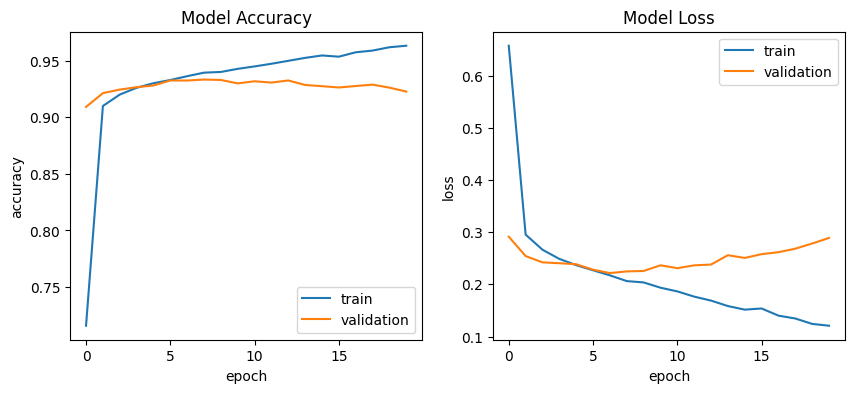

In [49]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

### Model Confusion Matrix

1140/1140 [==============================] - 6s 5ms/step


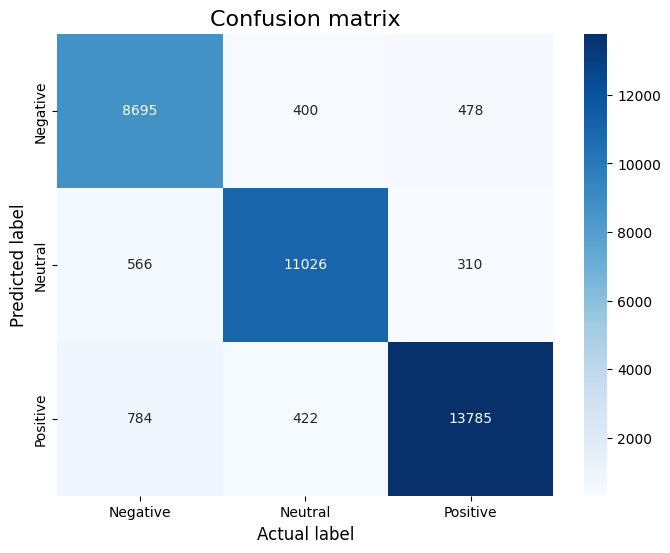

In [50]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

### Model save and load for the prediction

In [51]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [52]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [53]:
predict_class(['"I hate when I have to call and wake people up'])

1/1 [==============================] - 1s 665ms/step
The predicted sentiment is Negative


In [54]:
predict_class(['The food was meh'])

1/1 [==============================] - 0s 28ms/step
The predicted sentiment is Neutral


In [55]:
predict_class(['He is a best minister india ever had seen'])

1/1 [==============================] - 0s 28ms/step
The predicted sentiment is Positive


To use the 'tweepy' API, you need to create an account with Twitter Developer. After creating the account, go to 'Get Started' option and navigate to the 'Create an app' option. After you create the app, note down the below required credentials from there.

## Fetching data from twitter

To get started, you’ll need to do the following things:

  * Set up a Twitter account if you don’t have one already.
  * Using your Twitter account, you will need to apply for Developer Access and then create an application that will generate the API credentials that you will use to access Twitter from Python.
  *  Import the `tweepy` package.

### Authorization

After installing and importing `tweepy` package (already done in the beginning),to access the Twitter API, you will need 4 things from the your Twitter App page. These keys are located in your Twitter app settings in the Keys and Access Tokens tab.

    consumer key
    consumer seceret key
    access token key
    access token secret key

Do not share these with anyone else because these values are specific to your app.

In [60]:
#Getting authorization
consumer_key= 'yourkeyhere'
consumer_secret= 'yourkeyhere'
access_token= 'yourkeyhere'
access_token_secret= 'yourkeyhere'

# Fix: Use 'consumer_secret' instead of 'consumer_key_secret'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [61]:
#Getting authorization
consumer_key= 'yourkeyhere'
consumer_secret= 'yourkeyhere'
access_token= 'yourkeyhere'
access_token_secret= 'yourkeyhere'

# Fix: Use 'consumer_secret' instead of 'consumer_key_secret'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Search Twitter for Tweets

### 1. Searching for a hashtag from a specified date

Now you are ready to search Twitter for recent tweets! You will use the `.Cursor` method to get an object containing tweets containing the hashtag #wildfires.

To create this query, you will define the:

   * Search term - in this case #WorkFromHome
   * the start date of your search

In [62]:
# Define the search term and the date_since date as variables
search_words = "#WorkFromHome"
date_since = "2021-06-10"

You can restrict the number of tweets returned by specifying a number in the `.items()` method. `.items(10)` will return 10 of the most recent tweets.

In [74]:
# Import necessary modules

import tweepy as tw

# **Replace these placeholders with your actual Twitter API credentials**
consumer_key = "YOUR_ACTUAL_CONSUMER_KEY"
consumer_secret = "YOUR_ACTUAL_CONSUMER_SECRET"
access_token = "YOUR_ACTUAL_ACCESS_TOKEN"
access_token_secret = "YOUR_ACTUAL_ACCESS_TOKEN_SECRET"

# Authenticate to Twitter (rest of the code remains the same)
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# ... (rest of the code)
auth.set_access_token(access_token, access_token_secret)

# Create API object
api = tw.API(auth)

# Define the search term and the date_since date as variables
search_words = "#WorkFromHome"
date_since = "2021-06-10"

# Collect tweets using search_tweets
tweets = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en",
              since=date_since).items(10)

# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)
    # predict_class([tweet.text]) #predicting sentiment (Commented out for testing)
    print("")

Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

### 2. Searching for a keyword

You can pass the keyword of your interest here and the number of tweets (in this case 10) to be downloaded through the tweepy API.

In [72]:
for tweet in api.search(q="elonmusk", lang="en", rpp=10):
    print(f"{tweet.user.name}:{tweet.text}")
    predict_class([tweet.text]) #predicting sentiment
    print("")

AttributeError: 'API' object has no attribute 'search'

### 3. Searching for a username

The `user_timeline()` method of the API class in Tweepy module is used to get the most recent statuses posted from the authenticating user or the user specified.

* `screen_name` = user id name of the twitter user
* `count` = no. of tweets to be fetched
* `lang` = language of tweet
* `tweet_mode = 'extended'` swaps the text index for full_text, and prevents a primary tweet longer than 140 characters from being truncated.


The below query pulls 10 tweets from Twitter user @ of english language and predicts its sentiments.

In [ ]:
posts = api.user_timeline(screen_name="elonmusk", count = 10, lang ="en", tweet_mode="extended")

l=[]
i=1

for tweet in posts[:10]:
    l.append(tweet.full_text)
    i=i+1
for j in range (0,9):
    print(l[j])
    predict_class([l[j]])  #predicting sentiment
    print("\n")